In [2]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
import matplotlib.pyplot as plt

# Get All NASDAQ Symbols

In [3]:
symbols = get_nasdaq_symbols()
all_symbols=symbols["Security Name"]
print(all_symbols.shape)
all_symbols.head()

(8915,)


Symbol
A                 Agilent Technologies, Inc. Common Stock
AA                        Alcoa Corporation Common Stock 
AAAU                         Perth Mint Physical Gold ETF
AACG    ATA Creativity Global - American Depositary Sh...
AADR                  AdvisorShares Dorsey Wright ADR ETF
Name: Security Name, dtype: object

# Read in data

In [4]:
data={}  # Save all raw data in this dict
missing=[] # Save a list of missing stock tickers
for stock_ticker in all_symbols.index[:20]:    # Only read in 20 entries for development purpose
    try:
        data[stock_ticker]=web.DataReader(stock_ticker, 'yahoo',start="2019-09-04")
        print(".", end ="") 
    except Exception as e:
        missing.append(stock_ticker)
        print(stock_ticker)
        continue

....................

In [5]:
len(data)

20

In [6]:
tickers=all_symbols.index[:3]
weights=np.repeat(1/3,3)
tickers

Index(['A', 'AA', 'AAAU'], dtype='object', name='Symbol')

In [7]:
weights.sum()

1.0

# Main Function

In [107]:
def portfolio(tickers,weights,backtest_window="2019-09-04",benchmark="SPY"):
    if weights.sum()!=1:
        print("Incorrect Weight Vector!")
        return -202,-202,-202
    if len(weights)!=len(tickers):
        print("Unmatched Dimensions!")
        return -203,-203,-203
    data=pd.DataFrame()
    bench=web.DataReader(benchmark, 'yahoo',start=backtest_window)["Close"]
    bench=bench[1:]/bench[0]
    for stock_ticker in tickers:
        data[stock_ticker]=web.DataReader(stock_ticker, 'yahoo',start=backtest_window)["Close"]
        print(".", end ="") 
    data_pct=data.pct_change()[1:]
    daily_portfolio_return=np.dot(data_pct,weights)
    mean_return=data_pct.mean()
    covariance_matrix=data_pct.cov()
    
    equity_curve=np.cumprod(daily_portfolio_return+1)
    ec=pd.Series(equity_curve,index=bench.index)
    fig=plt.figure()
    plt.plot(ec,label="Equity_Curve")
    plt.plot(bench,label="Benchmark")
    plt.xlabel("Day")
    plt.ylabel("Cummulative Percentage Return")
    plt.title("Portfolio Equity Curve")
    plt.legend()
    return daily_portfolio_return,mean_return,covariance_matrix,fig

...

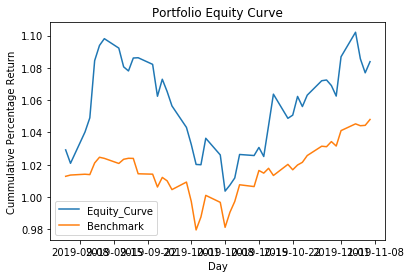

In [108]:
daily_portfolio_return,mean_return,covariance_matrix,fig=portfolio(tickers,weights,backtest_window="2019-09-04",benchmark="SPY")